## Homework 3 Phys 115
Jesus Javier Serrano
5/9/18

### Problem 1
In this exercise we shall look into the Point spread function and apply it to a spectral analysis of a pulsar. Provided with a pulsar by the name of PSR B1509-58 we may define the spectral power-plot as such:
$$F(E) = k*E^{-\alpha} \exp\left(-\frac{E}{E_c}\right)$$
where each other parameter is defined to be constant. Now we shall look into using this spectral plot by first normailizing it at a given interval in order to use it as a proability distribution.
We will focus on the energy interval of [20Mev, 50Mev], given that $\alpha = 1.87, k = 1X10^{-4}s^{-1}cm^{-2}, E_c = 81MeV$. We are also provided the plot area within this interval which is about $4.14575 X 10^{-6}$.
We shall then normailize the spectral function as follows: $F_n(E) = N * F(E)$ where $N \in \mathbb{R}$ and $N * \int_{20}^{500} F(E) dE = 1$. It is provided that the area under the curve within the interval is about $4.14575* 10^{-6}$ thus we may set $N = 2.4121*10^5$.

Let's take a step back and analyze this function a bit further. Knowing that $F(E)$ is characterized as a spectral analysis plot of the photon intensities at differnt energy levels then we may state that $F(E)$ works out as histogram function for photons in different energy values as well. Once the function is normailized in our desired interval then $F(E)$ has turned into a probability density function $F_n(E) = \mathbb{P}_E$ and $\sum F_n(E) = \sum \mathbb{P}_E = 1$. Thus $F_n(E)$ where $\forall E \in \left[20 MeV, 500 MeV\right], \exists F_n | F_n: E \rightarrow \mathbb{P}_E$ where and $\mathbb{P}_E$ is the probability of a photon's capture in the detector with enery $E$.

This is fantastic because now we don't need to assign a weight function to the spectrum fucntion because of the fact that our spectrum function is already weighted depending on the photon's energy value and is normalized along our desired interval. The fact that our spectrum function is now a probability density means that if we were to use a generator of some sort where at a given E-value we roll some dice and shot a dart along the normalized spectrum range of $F_n(E)$, or in a range of $[0, 1]$, then by definition the probability in which the dart hits below the $F_n(E)$ value is equal to $F_n(E)$. In other words, this means that if we shot N number of darts at an E-value of 40 MeV then the ratio of darts that hit below $F_n$(40 MeV) over the total number of darts should be approximately equal to $F_n$(40 MeV); assuming we use a uniform random generator. To put it short:
$$(\forall E \in \left[20 MeV, 500 MeV\right])\wedge(\forall N_{\text{darts}} \in \mathbb{N}| N_{\text{under}} + N_{\text{over}} = N_{\text{darts}}), \exists F_n | (F_n: E \rightarrow \mathbb{P}_E)\wedge(\frac{N_{\text{under}}}{N_{\text{darts}}} \approx F_n(E))$$

Now that we have settled the math we may build our code to obtian our desired 100,000 photon energies, enter the Metropolis algorithm. Keep in mind that in order to obtain 100,000 photons we need $N_{\text{under}} = 100,000$ not $N_{\text{darts}} = 100,000$ and in our situation we shall just shoot one dart per chosen E-value since the metropolis algorithm makes a sweep of a sample of 1-D range of darts unnecesary.

100%|██████████| 99999/99999 [00:40<00:00, 2499.20it/s]


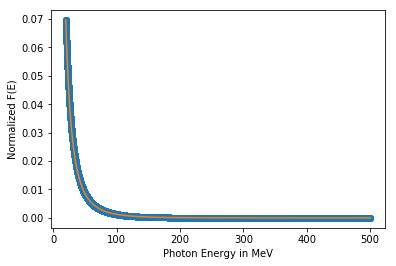

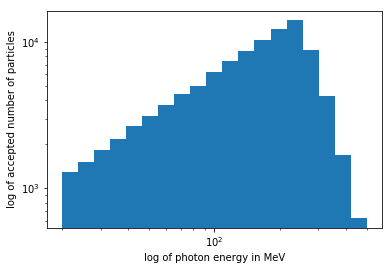

In [31]:
#x-array of possible photon energies
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

x = np.linspace(20, 500, 100000)

# Now define the normalized spectral power plot
def fo(x):
    a = 1.87
    k = 1.0*(10**-4)
    n = 2.4121*(10**5)
    return n*k*(x**-a)*np.exp(-x/81)

#This will be the weighted choice of the metropolis algorithm
def w(x):
    if x<20 or x>500:
        return 0.
    else:
        return fo(x)

# Let us confine our y-range with a W smaller than 1
pwr_spec = fo(x)
W_o = max(pwr_spec)

#start as some arbitrary energy level
n = rd.choice(np.array([0,1]))
x_o = 250 + (((-1)**n)*(rd.random()*(10)))
x_i = x_o

# Define the Metropolis algorithm
met_xval= np.array([])
met_yval= np.array([])
met_xval = np.append(x_i, met_xval)
met_yval = np.append(0, met_yval)
def Meta(x, w):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (260*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        r = w(x_t)/w(x)
        if r > rd.random():
            return x_t
        #else:
            #print('fail')
'''N = 0
while N < 999999:
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    N += 1
    print(N)'''
    
for i in tqdm(range(99999)):
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    
#Let us plot our accepted values
plt.plot(met_xval, met_yval, 'o')
plt.plot(x, pwr_spec, '-')
plt.xlabel('Photon Energy in MeV')
plt.ylabel('Normalized F(E)')
plt.show()

#plt.plot(np.log(x), np.log(pwr_spec))
#plt.hist(met_xval, 20, log=True)
#plt.show()


plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('log of photon energy in MeV')
plt.ylabel('log of accepted number of particles')
plt.show()

Notice that the sample mean according the log-scale histogram is about 250 Mev. The particle number denisty in this case seems to be negatively skewed where there is a steep decline in number density once we go beyond the sample mean of the histogram.

Now that we've worked through the process of generating observed particles dependent on energy let us now work on generating observed particles dependent on position. Enter the location dependent distribution:
$$F(x| \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$
where $\mu$ is the sample mean and $\sigma$ is the standard deviation which is defined as $\sigma = \left(\frac{E}{100 \text{MeV}}\right)^{-0.8}$. With this 1-D distribtion function we shall now look into generating our set of 2-D points by applying the distribution independently on each dimension.

It's a good thing that we already have our random sample algorithm built so let us copy our code and modify it a bit. Also we are given the fact that our pulsar is located at the coordinates [48.04, -30.92] which means that our sample mean for observed particles must be approximately located at those coordinates in a 2-D histogram. So let us set $\mu_x= 48.04$ and $\mu_y = -30.92$ for our x and y distribution functions. Note that our x-coordinates are in units of Right Ascension and the y-coordinates are in units of Declination.

In [75]:
#Individual parameters
mu_x = 48.04
x_int = np.linspace(43, 52, 1000)

mu_y = -30.92
y_int = np.linspace(-35, -25, 1000)
#Note that each interval was span from mu by 5 sigma both ways for E = 100

def sig(E):
    an = E/100
    return an**(-0.8)

#Distribution function
def fs(s, mu, sig, E):
    sisg= sig(E)
    a = 1/(2*np.pi*sisg)
    a1 = (s - mu)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b

# Our new weight constraint
def w(x, arry, mu, sig, E):
    if x<min(arry) or x>max(arry):
        return 0.
    else:
        return fs(x, mu, sig, E)
    

#New Metropolis function
def Meta1(x, mu, w, arry, sig, E):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (mu*rd.random()*((-1)**rd.choice(np.array([0,1]))))
        r = w(x_t, arry, mu, sig, E)/w(x, arry, mu, sig, E)
        if r > rd.random():
            return x_t
        
# Define the new Metropolis algorithm
def one_d_dis(mu, w, arry, sig, fs, E):
    Nom = np.trapz(fs(arry, mu, sig, 100), arry, dx=((max(arry) - min(arry))/1000))
    pwr_spec = fs(arry, mu, sig, 100)/Nom
    n = rd.choice(np.array([0,1]))
    x_o = mu + (((-1)**n)*(rd.random()*(.01)))
    x_i = x_o

    met_xval= np.array([])
    met_fval= np.array([])
    met_xval = np.append(x_i, met_xval)
    met_fval = np.append(0, met_fval)

    for i in tqdm(range(99999)):
        x_i = met_xval[len(met_xval) - 1]
        next_x = Meta1(x_i, mu, w, arry, sig, E)
        met_xval = np.append(next_x, met_xval)
        fs_o = fs(next_x, mu, sig, 100)/Nom
        met_fval = np.append(fs_o, met_fval)

    #Let us plot our accepted values
    plt.plot(met_xval, met_fval, 'o')
    plt.plot(arry, pwr_spec, '-')
    if mu == mu_x:
        plt.xlabel('Right Ascension')
    elif mu == mu_y:
        plt.ylabel('Declination')
    plt.ylabel('Fn(x)')
    plt.show()


    plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    if mu == mu_x:
        plt.xlabel('log of Right Ascension')
    elif mu == mu_y:
        plt.ylabel('log of Declination')
    plt.ylabel('log of accepted number of particles')
    plt.show()
    
    return met_xval, met_fval

#obtain our simulated values

'''sim_ra_val, sim_ra_prob = one_d_dis(mu_x, w, x_int, sig, fs, 100)
sim_dec_val, sim_dec_prob = one_d_dis(mu_y, w, y_int, sig, fs, 100)

#plot our 2-D histogram
plt.hist2d(sim_ra_val, sim_dec_val, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()'''

'sim_ra_val, sim_ra_prob = one_d_dis(mu_x, w, x_int, sig, fs, 100)\nsim_dec_val, sim_dec_prob = one_d_dis(mu_y, w, y_int, sig, fs, 100)\n\n#plot our 2-D histogram\nplt.hist2d(sim_ra_val, sim_dec_val, bins=40, norm=LogNorm())\nplt.colorbar()\nplt.show()'

The great thing about the code above is that a function has been devised to to take in which ever distribution function of your choosing and simulate 100,000 particles with any level of energy. The downside of this function is that it takes in too many parameters and is computationaly inefficient. So we may decide to overclock the processor of our computer in order to run the program faster, or a safer option is to rewrite the code so that it takes in less parameters and calls in less functions.

In [42]:
sim_ra_val, sim_ra_prob = one_d_dis(mu_x, w, x_int, sig, fs, 100)


100%|██████████| 99999/99999 [7:18:33<00:00, 29.06it/s]      


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
sim_dec_val, sim_dec_prob = one_d_dis(mu_y, w, y_int, sig, fs, 100)

The goal here is to divide the work of the code such that each individual axis is simulated independently, one-by-one, by using the faster program which we set up for the energy distribution simulation.

100%|██████████| 99999/99999 [00:50<00:00, 1994.66it/s]


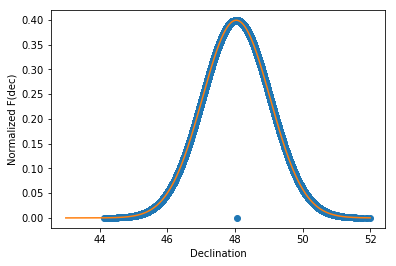

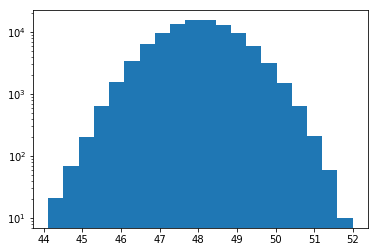

In [98]:
#x-array of possible photon energies
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

E = 100
mu_x = 48.04
x_int = np.linspace(43, 52, 1000)



#Distribution function
def fsx(s, E):
    an = E/100
    sisg= an**(-0.8)
    a = 1/(2*np.pi*sisg)
    a1 = (s - 48.04)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b

#This will be the weighted choice of the metropolis algorithm


# Let us confine our y-range with a W smaller than 1
Nomx = np.trapz(fsx(x_int, E), x_int, dx=((max(x_int) - min(x_int))/1000))
pwr_spec = fsx(x_int,E)/Nomx
W_o = max(pwr_spec)

def w(x, E, N):
    if x<43 or x>52:
        return 0.
    else:
        return fsx(x, E)/N
#start as some arbitrary energy level
n = rd.choice(np.array([0,1]))
x_o = mu_x + (((-1)**n)*(rd.random()*(.1)))
x_i = x_o

# Define the Metropolis algorithm
met_xval= np.array([])
met_fval= np.array([])
met_xval = np.append(x_i, met_xval)
met_fval = np.append(0, met_fval)
def Meta(x, w, E, N):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (5*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        r = w(x_t, E, N)/w(x, E, N)
        if r > rd.random():
            return x_t
        #else:
            #print('fail')
'''N = 0
while N < 999999:
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    N += 1
    print(N)'''
    
for i in tqdm(range(99999)):
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w, E, Nomx)
    met_xval = np.append(next_x, met_xval)
    met_fval = np.append(fsx(next_x, E)/Nomx, met_fval)
    
#Let us plot our accepted values
plt.plot(met_xval, met_fval, 'o')
plt.plot(x_int, pwr_spec, '-')
plt.xlabel('Declination')
plt.ylabel('Normalized F(dec)')
plt.show()

#plt.plot(np.log(x), np.log(pwr_spec))
plt.hist(met_xval, 20, log=True)
plt.show()


#plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#plt.xlabel('log of Declination')
#plt.ylabel('log of accepted number of particles')
#plt.show()

100%|██████████| 99999/99999 [00:42<00:00, 2331.08it/s]


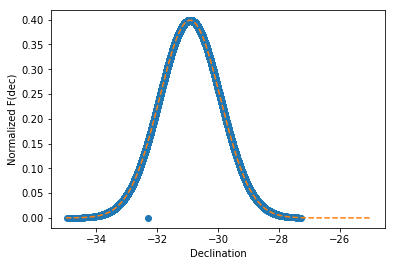

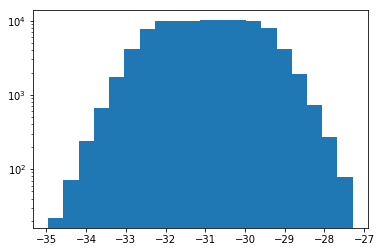

In [99]:
#x-array of possible photon energies
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm


mu_y = -30.92
y_int = np.linspace(-35, -25, 1000)

# Now define the normalized spectral power plot
#Distribution function
def fsy(s, E):
    E = 100
    an = E/100
    sisg= an**(-0.8)
    a = 1/(2*np.pi*sisg)
    a1 = (s + 30.92)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b

#This will be the weighted choice of the metropolis algorithm

# Let us confine our y-range with a W smaller than 1
Nomy = np.trapz(fsy(y_int, E), y_int, dx=((max(y_int) - min(y_int))/1000))
pwr_spec = fsy(y_int, E)/Nomy
W_o = max(pwr_spec)

def wy(x, E, N):
    if x<-35 or x>-25:
        return 0.
    else:
        return fsy(x, E)/N

#start as some arbitrary energy level
n = rd.choice(np.array([0,1]))
y_o = mu_y + (((-1)**n)*(rd.random()*2))
y_i = y_o

# Define the Metropolis algorithm
met_yval= np.array([])
met_fval= np.array([])
met_yval = np.append(y_i, met_yval)
met_fval = np.append(0, met_fval)
def Meta(y, wy, E, N):
    #iterate until we get an accepted value
    while 1:
        y_t = y + (5*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        r = wy(y_t, E, N)/wy(y, E, N)
        if r > rd.random():
            return y_t
        #else:
            #print('fail')
'''N = 0
while N < 999999:
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    N += 1
    print(N)'''
    
for i in tqdm(range(99999)):
    y_i = met_yval[len(met_yval) - 1]
    next_y = Meta(y_i, wy, E, Nomy)
    met_yval = np.append(next_y, met_yval)
    met_fval = np.append(fsy(next_y, E)/Nomy, met_fval)
    
#Let us plot our accepted values
plt.plot(met_yval, met_fval, 'o')
plt.plot(y_int, pwr_spec, '--')
plt.xlabel('Declination')
plt.ylabel('Normalized F(dec)')
plt.show()

#plt.plot(np.log(x), np.log(pwr_spec))
plt.hist(met_yval, 20, log=True)
plt.show()


#plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#plt.xlabel('log of Declination')
#plt.ylabel('log of accepted number of particles')
#plt.show()

In [95]:
y_i

47.99604533137132

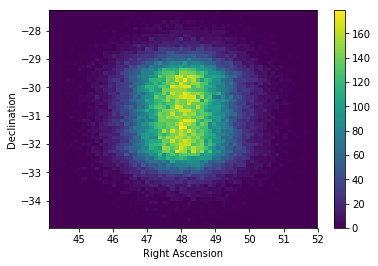

In [105]:
plt.hist2d(met_xval, met_yval, bins=64)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar()
plt.show()

There it is, our beautiful simulated histogram of particles associated with their location in space. Our pic is looking similar to the captured image of PSR B1509-58, but it can be improved. Now let's allocate both the energy and location of the particles and simulate the observation of 100,000 particles as such.

In [80]:
#x-array of possible photon energies
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

#Assigned interval parameters for simulation
en = np.linspace(20, 500, 100000)

mu_x = 48.04
x_int = np.linspace(43, 52, 1000)

mu_y = -30.92
y_int = np.linspace(-35, -25, 1000)

#The normalized spectral power plot
def fo(x):
    a = 1.87
    k = 1.0*(10**-4)
    n = 2.4121*(10**5)
    return n*k*(x**-a)*np.exp(-x/81)

#Distribution function for the 1-D location of particle
def fs(s, E, mu):
    an = E/100
    sisg= an**(-0.8)
    a = 1/(2*np.pi*sisg)
    a1 = (s - mu)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b
#We also need to normailize our location distribution:
def Nom(fs, arry, E, mu):
    return np.trapz(fs(arry, E, mu), y_int, dx=((max(arry) - min(arry))/1000))

#normalized dist
def fos(s, E, mu, n):
    return fs(s, E, mu)/n
#Normalize constants
Nx = Nom(fs, x_int, E, mu_x)
Ny = Nom(fs, x_int, E, mu_x)

#This will be the weighted choice of the metropolis algorithm for energy
def w(f, arry, x):
    if x<min(arry) or x>max(arry):
        return 0.
    else:
        return f(x)
#This will be the weighted choice of the metropolis algorithm for location
def wl(f, arry, x, E, mu, n):
    if x<min(arry) or x>max(arry):
        return 0.
    else:
        return f(x, E, mu, n)
    
# Define the Metropolis algorithm for energy
def MetaE(x, w, fo):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (260*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        r = w(fo, en, x_t)/w(fo, en, x)
        if r > rd.random():
            return x_t
        #else:
            #print('fail')
            
#Define the Metropolis algorithm for location
def MetaL(x, w, arry, f, n, E, mu):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (5*rd.random()*((-1)**rd.choice(np.array([0,1]))))
        r = wl(f, arry, x_t, E, mu, n)/wl(f, arry, x, E, mu, n)
        if r > rd.random():
            return x_t

#start as some arbitrary energy level
n = rd.choice(np.array([0,1]))
x_o = 250 + (((-1)**n)*(rd.random()*2))
x_i = x_o

met_eval = np.array([])
met_xval= np.array([])
met_yval= np.array([])

#initial point to start the simulation
met_eval = np.append(x_i, met_eval)
met_xval = np.append(mu_x, met_xval)
met_yval = np.append(mu_y, met_yval)
    
for i in tqdm(range(99999)):
    x_i = met_eval[len(met_eval) - 1]
    xx_i= met_xval[len(met_xval) - 1]
    y_i= met_yval[len(met_yval) - 1]
    Nx = Nom(fs, x_int, x_i, mu_x)
    Ny = Nom(fs, y_int, x_i, mu_y)
    #pwr_spec_x = fs(x_int, x_i, mu_x)/Nx
    #pwr_spec_y = fs(y_int, x_i, mu_y)/Ny
    
    next_e = MetaE(x_i, w, fo)
    next_x= MetaL(xx_i, wl, x_int, fos, Nx, x_i, mu_x)
    next_y= MetaL(y_i, wl, y_int, fos, Ny, x_i, mu_y)
    met_eval = np.append(next_e, met_eval)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(next_y, met_yval)

#start as some arbitrary energy level


#plt.show()

 14%|█▍        | 14411/99999 [49:57<4:58:58,  4.77it/s] 

KeyboardInterrupt: 

Again, I made this code for a general case, however the computational power needed to run this may require more than 1 cpu cores if you want to have the program done in less than an hour. Welp, as always let's breakdown the program into sections to avoid overcrowding the processor with several function and module calls.

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

en = np.linspace(20, 500, 100000)

# Now define the normalized spectral power plot
def fo(x):
    a = 1.87
    k = 1.0*(10**-4)
    n = 2.4121*(10**5)
    return n*k*(x**-a)*np.exp(-x/81)

#This will be the weighted choice of the metropolis algorithm
def w(x):
    if x<20 or x>500:
        return 0.
    else:
        return fo(x)

# Let us confine our y-range with a W smaller than 1
pwr_spec = fo(en)
W_o = max(pwr_spec)

#start as some arbitrary energy level
n = rd.choice(np.array([0,1]))
e_o = 250 + (((-1)**n)*(rd.random()*(10)))
e_i = e_o

# Define the Metropolis algorithm
met_eval= np.array([])
met_eval = np.append(e_i, met_eval)
def Meta(x, w):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (260*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        r = w(x_t)/w(x)
        if r > rd.random():
            return x_t
        #else:
            #print('fail')
'''N = 0
while N < 999999:
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    N += 1
    print(N)'''
    
for i in tqdm(range(99999)):
    e_i = met_eval[len(met_eval) - 1]
    next_e = Meta(e_i, w)
    met_eval = np.append(next_e, met_eval)
    
'''#Let us plot our accepted values
plt.plot(met_xval, met_yval, 'o')
plt.plot(x, pwr_spec, '-')
plt.xlabel('Photon Energy in MeV')
plt.ylabel('Normalized F(E)')
plt.show()

#plt.plot(np.log(x), np.log(pwr_spec))
#plt.hist(met_xval, 20, log=True)
#plt.show()


plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('log of photon energy in MeV')
plt.ylabel('log of accepted number of particles')
plt.show()'''

100%|██████████| 99999/99999 [00:25<00:00, 3902.96it/s]


'#Let us plot our accepted values\nplt.plot(met_xval, met_yval, \'o\')\nplt.plot(x, pwr_spec, \'-\')\nplt.xlabel(\'Photon Energy in MeV\')\nplt.ylabel(\'Normalized F(E)\')\nplt.show()\n\n#plt.plot(np.log(x), np.log(pwr_spec))\n#plt.hist(met_xval, 20, log=True)\n#plt.show()\n\n\nplt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))\nplt.gca().set_xscale("log")\nplt.gca().set_yscale("log")\nplt.xlabel(\'log of photon energy in MeV\')\nplt.ylabel(\'log of accepted number of particles\')\nplt.show()'

In [4]:

mu_x = 48.04
x_int = np.linspace(43, 52, 1000)

mu_y = -30.92
y_int = np.linspace(-35, -25, 1000)


#Distribution function RA
def fsx(s, E):
    an = E/100
    sisg= an**(-0.8)
    a = 1/(2*np.pi*sisg)
    a1 = (s - 48.04)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b

#Distribution function DEC
def fsy(s, E):
    E = 100
    an = E/100
    sisg= an**(-0.8)
    a = 1/(2*np.pi*sisg)
    a1 = (s + 30.92)**2
    a2 = 2*(sisg**2)
    b = np.exp(-a1/a2)
    return a*b
#This will be the weighted choice of the metropolis algorithm



def Nomx(fs, arry, E, mu):
    return np.trapz(fs(arry, E), y_int, dx=((max(arry) - min(arry))/1000))


'''pwr_spec = fsx(x_int,E)/Nomx
W_o = max(pwr_spec)'''

def wx(x, E, N):
    if x<43 or x>52:
        return 0.
    else:
        return fsx(x, E)/N
    
def wy(x, E, N):
    if x<-35 or x>-25:
        return 0.
    else:
        return fsy(x, E)/N

    
n = rd.choice(np.array([0,1]))
x_o = mu_x + (((-1)**n)*(rd.random()*(.1)))
x_i = x_o
Nx_o = Nomx(fsx, x_int, met_eval[0], mu_x)
wx_i = wx(x_o, met_eval[0], Nx_o)

# Define the Metropolis algorithm
met_xval= np.array([])
#met_fval= np.array([])
#met_xval = np.append(x_i, met_xval)
#met_fval = np.append(0, met_fval)
def MetaL(x, w, w_i, E, N):
    #iterate until we get an accepted value
    while 1:
        x_t = x + (5*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
        a = w(x_t, E, N)
        r = a/w_i
        if r > rd.random():
            return x_t, a
        #else:
            #print('fail')
'''N = 0
while N < 999999:
    x_i = met_xval[len(met_xval) - 1]
    next_x = Meta(x_i, w)
    met_xval = np.append(next_x, met_xval)
    met_yval = np.append(fo(next_x), met_yval)
    N += 1
    print(N)'''
    

for E in tqdm(met_eval):
    Nx = Nomx(fsx, x_int, E, mu_x)
    next_x, wx_i = MetaL(x_i, wx, wx_i, E, Nx)
    met_xval= np.append(next_x, met_xval)
    x_i = met_xval[len(met_xval) - 1]
    #met_fval = np.append(fsx(next_x, E)/Nomx(fs, arry, E, mu), met_fval)
    
print('Done simulating RA values')


n = rd.choice(np.array([0,1]))
y_o = mu_y + (((-1)**n)*(rd.random()*2))
y_i = y_o
Ny_o = Nomx(fsy, y_int, met_eval[0], mu_y)
wy_i = wy(y_o, met_eval[0], Ny_o)
# Define the Metropolis algorithm
met_yval= np.array([])
#met_fval= np.array([])
#met_yval = np.append(y_i, met_yval)
#met_fval = np.append(0, met_fval)



for E in tqdm(met_eval):
    Ny = Nomx(fsy, y_int, E, mu_y)
    next_y, wy_i = MetaL(y_i, wy, wy_i, E, Ny)
    met_yval = np.append(next_y, met_yval)
    y_i = met_yval[len(met_yval) - 1]
    #met_fval = np.append(fsy(next_y, E)/Nomy, met_fval)
print('Done simulating DEC values')


#met_xval = np.delete(met_xval, met_xval[0])
#met_yval = np.delete(met_yval, met_yval[0])

    #Let us plot our accepted values
'''plt.plot(met_xval, met_fval, 'o')
plt.plot(x_int, pwr_spec, '-')
plt.xlabel('Declination')
plt.ylabel('Normalized F(dec)')
plt.show()

#plt.plot(np.log(x), np.log(pwr_spec))
plt.hist(met_xval, 20, log=True)
plt.show()'''


100%|██████████| 100000/100000 [02:07<00:00, 783.93it/s]


Done simulating RA values


100%|██████████| 100000/100000 [01:59<00:00, 836.48it/s]


Done simulating DEC values


"plt.plot(met_xval, met_fval, 'o')\nplt.plot(x_int, pwr_spec, '-')\nplt.xlabel('Declination')\nplt.ylabel('Normalized F(dec)')\nplt.show()\n\n#plt.plot(np.log(x), np.log(pwr_spec))\nplt.hist(met_xval, 20, log=True)\nplt.show()"

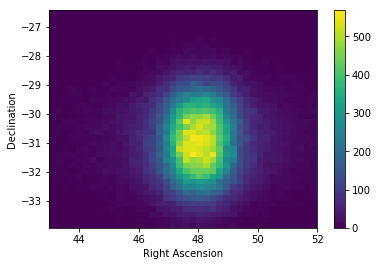

In [5]:
part_dens, xbins, ybins, ax = plt.hist2d(met_xval, met_yval, bins=40)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar()
plt.show()


Note that the algorithm used in this example had to be altered in order to avoid an overestimate error. The correction was applied such that for every iteration on producing a coordinate, the previous coordinate's weight had to be accounted for which was dependent on the previous energy level and 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lin_approx(f, x_o, x):
    h = 1E-5
    forwd = f(x_o + h)
    m = (f(x_o + h) - f(x_o))/h
    b = f(x_o) - (m*x_o)
    return (m*x) + b

def x_int_approx(f, x_o, h):
    forwd = f(x_o + h)
    m = (f(x_o + h) - f(x_o))/h
    b = f(x_o) - (m*x_o)
    return -b/m

class test_fnt:
    def __init__(self, funct, val, step):
        self.funct = funct
        self.val = val
        self.step = step

def dumm(x):
    return (2*x) - 3*(x**3)

ftst = test_fnt(dumm, 5, 1E-10)
x_loc = x_int_approx(ftst.funct, ftst.val, ftst.step)
print(x_loc)


def threshold_tst(fst, lst):
    dif = abs(fst - lst)
    return dif/fst


def nxt_guess(f, guess, h):
    mv_x = x_int_approx(f, guess, h)
    new_val = f(mv_x)
    
    marker = threshold_test(f(guess), new_val)
    return mv_x, new_val, marker


def find_zero(f, g1, g2):
    foc_x = pot_crit_finder(f, g1, g2)
    strt = np.mean(foc_x)
    
        
        
    

3.363229747642952


In [1]:
import numpy as np
import random as rndm



def cub(x):
    return ((3*x) -4)**4

def sqr(x):
    return (x - 4)**2

def rnd(x):
    return x**3 + 2*(x**2) - 8*x +10
    #return 10 - 8*x

def pot_crit_finder(fn, g1, g2):
    meter = 1
    finish = 1e-8
    minm= g1
    maxm= g2
    h = (maxm - minm)/20
    x_loc = np.empty(1)
    
    failbreak= 0

    while meter > finish:
        tst_space = np.arange(minm, maxm, h)
        print(tst_space)
        f_rnge = fn(tst_space)
        f_pl = fn(tst_space + h)
        f_mn = fn(tst_space - h)
        dif_pl = f_pl - f_rnge
        dif_mn = f_rnge - f_mn

        pot_crits_pl = []

        for s in range(len(dif_pl) - 1):
            spot = np.sign(dif_pl[s])
            step = np.sign(dif_pl[s + 1])
            if step != spot:
                pot_crits_pl.append(tst_space[s])
        print(pot_crits_pl)

        pot_crits_mn = []

        for s in range(len(dif_mn) - 1):
            spot = np.sign(dif_mn[s])
            step = np.sign(dif_mn[s + 1])
            if step != spot:
                pot_crits_mn.append(tst_space[s])
        print(pot_crits_mn)

        lim = min(len(pot_crits_pl), len(pot_crits_mn))
        mn_factor = np.asarray(pot_crits_pl[:lim]) - np.asarray(pot_crits_mn[:lim])
        if len(mn_factor)>0:
            meter = min(abs(mn_factor))
        
            if meter < finish:
                x_loc = pot_crits_pl
                failbreak += 1
            else:
                bot = min(min(pot_crits_pl), min(pot_crits_mn))
                top = max(max(pot_crits_mn), max(pot_crits_pl))
                h = (top - bot)/20
                minm = min(pot_crits_pl) - 16*(h*rndm.random())
                maxm = max(pot_crits_mn) + 16*(h*rndm.random())
                print(minm)
                print(maxm)
                print(meter)
                failbreak += 1
        
        elif failbreak > 50:
            print('Failed to find critical points after %s iterations'%50)
            x_loc = np.empty(1)
            break
            

        else:
            h = (maxm - minm)/20
            minm = minm - 16*(h*rndm.random())
            maxm = maxm + 16*(h*rndm.random())
            print(minm)
            print(maxm)
            print(meter)
            failbreak += 1


    print(x_loc)
    return x_loc

pot_crit_finder(rnd, 1, 2)    


[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95]
[1.05]
[1.1000000000000001]
1.04955869535
1.12677250763
0.05
[ 1.0495587  1.0520587  1.0545587  1.0570587  1.0595587  1.0620587
  1.0645587  1.0670587  1.0695587  1.0720587  1.0745587  1.0770587
  1.0795587  1.0820587  1.0845587  1.0870587  1.0895587  1.0920587
  1.0945587  1.0970587  1.0995587  1.1020587  1.1045587  1.1070587
  1.1095587  1.1120587  1.1145587  1.1170587  1.1195587  1.1220587
  1.1245587]
[1.0945586953476463]
[1.0970586953476462]
1.09350771094
1.09828696143
0.0025
[ 1.09350771  1.09363271  1.09375771  1.09388271  1.09400771  1.09413271
  1.09425771  1.09438271  1.09450771  1.09463271  1.09475771  1.09488271
  1.09500771  1.09513271  1.09525771  1.09538271  1.09550771  1.09563271
  1.09575771  1.09588271  1.09600771  1.09613271  1.09625771  1.09638271
  1.09650771  1.09663271  1.09675771  1.09688271  1.09700771  1.09713271
  1.09725771  1.09738271  

[1.0971675163557055,
 1.0971675193463193,
 1.0971675253275468,
 1.0971675283181606,
 1.0971675313087743,
 1.0971675342993881,
 1.0971675372900018,
 1.0971675402806156,
 1.0971675432712293,
 1.0971675462618431,
 1.0971675492524569,
 1.0971675552336844]

In [17]:
import random as rnd
rn

1

In [29]:
np.delete(faky, faky[0])

array([1, 3])